## Problem Statement:
To build a NLP  model that is able to classify customer complaints based on the products/services. Doing so, to segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue
.

## Understanding Problem Statement:

Assumption: For a financial company, customer complaints carry a lot of importance, as they are often an indicator of the shortcomings in their products and services. If these complaints are resolved efficiently in time, they can bring down customer dissatisfaction to a minimum and retain them with stronger loyalty. This also gives them an idea of how to continuously improve their services to attract more customers. 

 

These customer complaints are <u>unstructured text data</u>; so, traditionally, companies need to allocate the task of evaluating and assigning each ticket to the relevant department to multiple support employees. This becomes tedious as the company grows and has a large customer base.

 

In this project, classification models are created that can automatically classify customer complaints based on the products and services that the ticket mentions.


## Objective:



We need to build a model that is able to classify customer complaints based on the products/services. By doing so, we can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

We will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, we need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, we will be able to map each ticket onto its respective department/category. We can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, we can classify any new customer complaint support ticket into its relevant department.
t department.


## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1. Data loading
2. Text preprocessing
3. Exploratory data analysis (EDA)
4. Feature extraction
5. Topic modelling 
6. Model building using supervised learning
7. Model inference

### Importing the necessary libraries

In [1]:
import json 
from spacy.cli import download
import re, nltk, spacy, string
nlp = spacy.load('en_core_web_sm')

# Importing libraries required for data analysis and to plot charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# Importing Regular Expressions for String manipulation
import re

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

### 1. Data Loading

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
file = 'customer-complaints.json'

# Opening JSON file 
f = open(file) 

# Returns JSON object as a dictionary 
data = json.load(f)


<b> Data preparation</b>

Data cleaning operations like filtering text, removing missing values & renaming column headers.

In [3]:
df=pd.json_normalize(data)


In [4]:
# Inspect the dataframe to understand the given data.
df.head(10)


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [5]:
# Print the column names
df.columns


Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [6]:
# Assign new column names
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()


,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [7]:
# lets rename the column names to be more readable 
# We have retained product and sub_product only for verification purpose ,
# These columns will not be used in the Topic modelling
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()


,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [8]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()


,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [9]:
# lets check the nan complaints
df.complaint_text.isnull().sum()


0

In [10]:
# lets check the empty string complaints
len(df[df['complaint_text']==''])


57241

In [11]:
# Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_text']==''] = np.nan
df.complaint_text.isnull().sum()


57241

In [12]:
# Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()


0

### 2. Text Preprocessing

Prepare the text for topic modeling

Once we have removed all the blank complaints, we need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once we have done these cleaning operations we need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


#### **Data Cleaning and Manipulation**

In [13]:
# Preparing text for Topic modelling
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()


In [14]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()


1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and was told b...
10    chase card was reported on however fraudulent ...
11    on while trying to book a xxxx  xxxx  ticket i...
14    my grand son give me check for i deposit it in...
Name: complaint_text, dtype: object

#### **Data Lemmatizer**

In [15]:
# lemmatization
#Function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)


In [16]:
# Lemmatize the complaints
df['lemma'] =  df.complaint_text.apply(lambda x: lemmatizer(x))
df.head()


,complaint_text,category,lemma
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...


In [17]:
# Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaint_text','lemma','category']]
df_clean.head()


,complaint_text,lemma,category
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account


#### **Data POS Tag Extraction**

In [18]:
# Extract the POS tags NN
def extract_pos_tags(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)
    

In [ ]:
# The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean['complaint_POS_removed'] =  df_clean.lemma.apply(lambda x: extract_pos_tags(x))
df_clean.head()


### 3. Exploratory data analysis (EDA)

#### We will perform Exploratory Data Analysis to get familiar with the data.


*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘


(array([9.236e+03, 6.356e+03, 2.725e+03, 1.276e+03, 7.570e+02, 2.750e+02,
        1.500e+02, 7.100e+01, 6.300e+01, 3.900e+01, 3.700e+01, 1.300e+01,
        1.100e+01, 1.100e+01, 8.000e+00, 8.000e+00, 7.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0. ,   248.5,   497. ,   745.5,   994. ,  1242.5,  1491. ,
         1739.5,  1988. ,  2236.5,  2485. ,  2733.5,  2982. ,  3230.5,
         3479. ,  3727.5,  3976. ,  4224.5,  4473. ,  4721.5,  4970. ,
         5218.5,  5467. ,  5715.5,  5964. ,  6212.5,  6461. ,  6709.5,
         6958. ,  7206.5,  7455. ,  7703.5,  7952. ,  8200.5,  8449. ,
         8697.5,  894

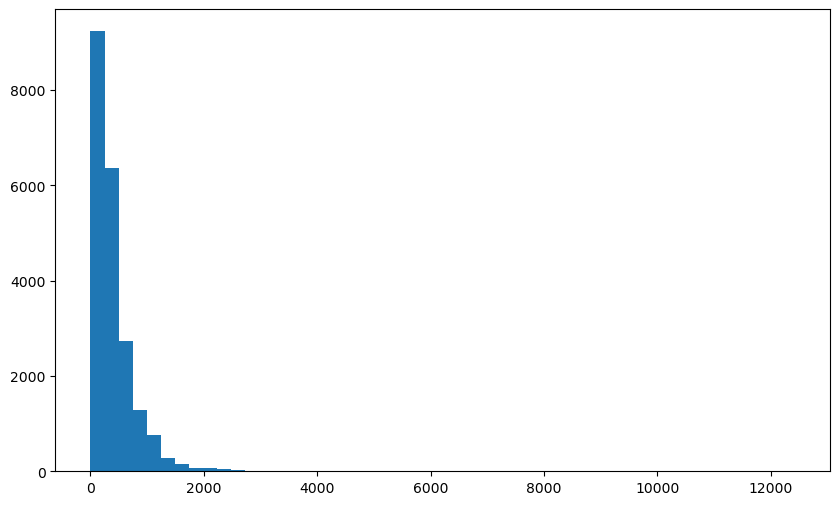

In [20]:
# Visualise the data according to the 'Complaint' character length

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)


#### Find the top 40 words by frequency among all the articles after processing the text.

In [21]:
!pip install wordcloud

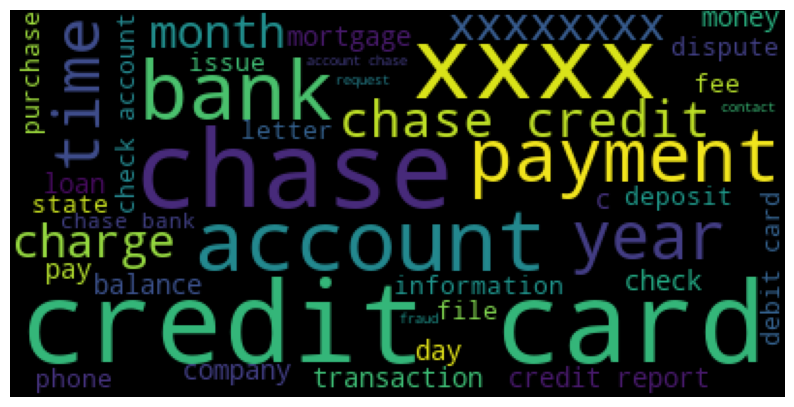

In [22]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stopwords,max_words=40).generate(str(df_clean.complaint_POS_removed))

print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [23]:
# Removing -PRON- from the text corpus

df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean = df_clean.drop(['complaint_POS_removed'],axis = 1)


#### Finding the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [24]:
# Among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]


In [25]:
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)


In [26]:
#Print the top 10 words in the unigram frequency

print('Top 10 unigrams:\n')
top_30_unigrams[:10]


Top 10 unigrams:



[('chase', 53419),
 ('account', 40961),
 ('credit', 33554),
 ('xxxx', 31291),
 ('card', 29835),
 ('payment', 21064),
 ('bank', 17038),
 ('time', 15871),
 ('charge', 15292),
 ('day', 12831)]

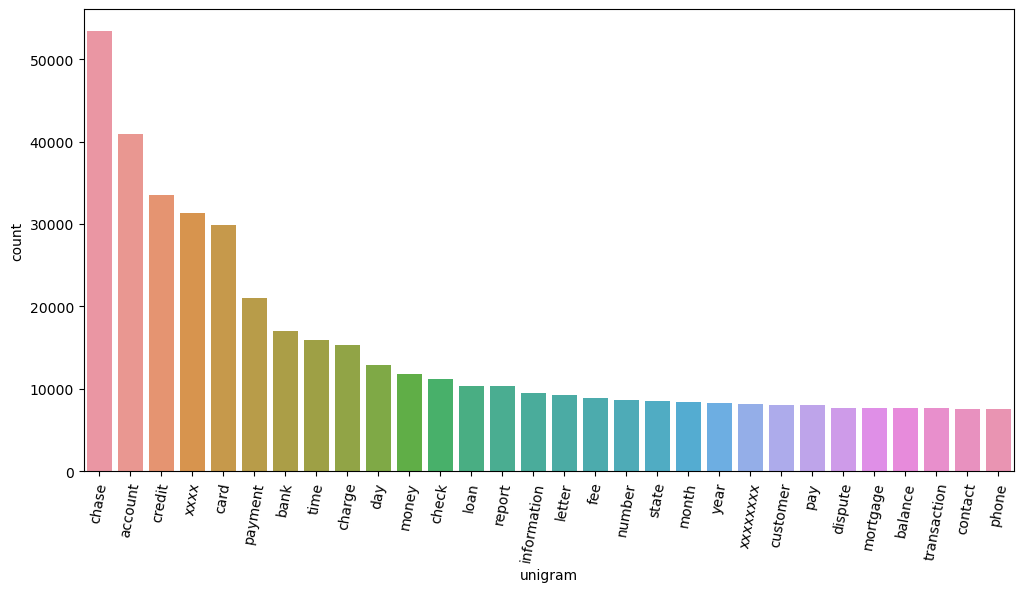

In [27]:
# Plot graph for the top 30 words in the unigram frequency

df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()


In [28]:
# Print the top 10 words in the bigram frequency

print('Top 10 bigrams:\n')
top_30_bigrams[:10]


Top 10 bigrams:



[('credit card', 12773),
 ('credit report', 3893),
 ('chase credit', 3070),
 ('customer service', 2923),
 ('account chase', 2432),
 ('chase bank', 2120),
 ('check account', 2113),
 ('chase account', 2034),
 ('xxxx xxxx', 1954),
 ('contact chase', 1893)]

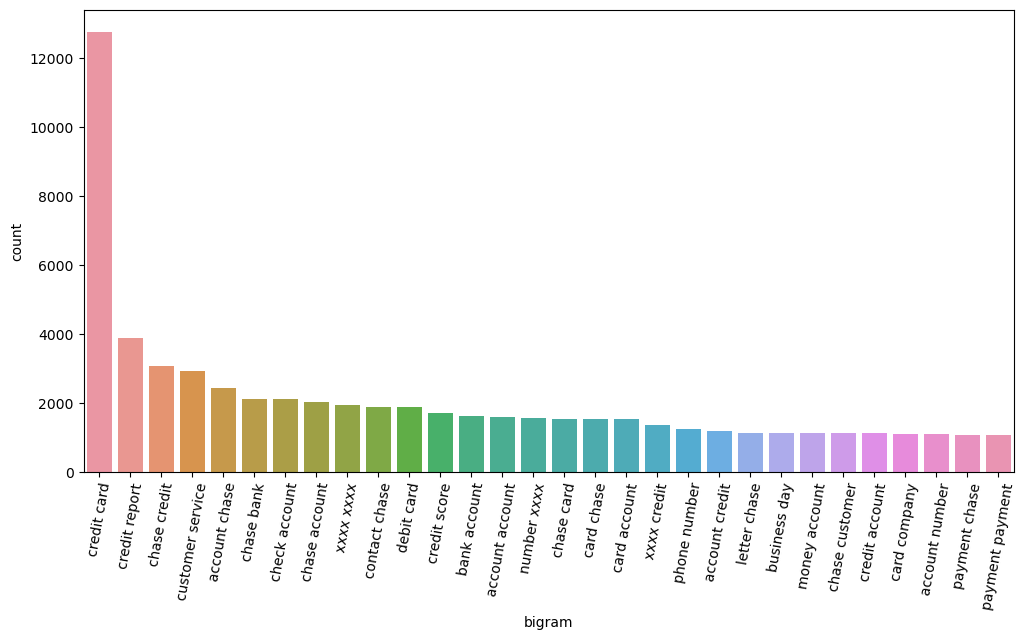

In [29]:
# Plot graph for the top 30 words in the bigram frequency

df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()


In [30]:
# Print the top 10 words in the trigram frequency

print('Top 10 trigrams:\n')
top_30_trigrams[:10]


Top 10 trigrams:



[('chase credit card', 2196),
 ('credit card account', 1050),
 ('credit card company', 978),
 ('credit card chase', 738),
 ('xxxx credit card', 653),
 ('chase customer service', 559),
 ('inquiry credit report', 483),
 ('credit card credit', 437),
 ('charge credit card', 406),
 ('credit card xxxx', 386)]

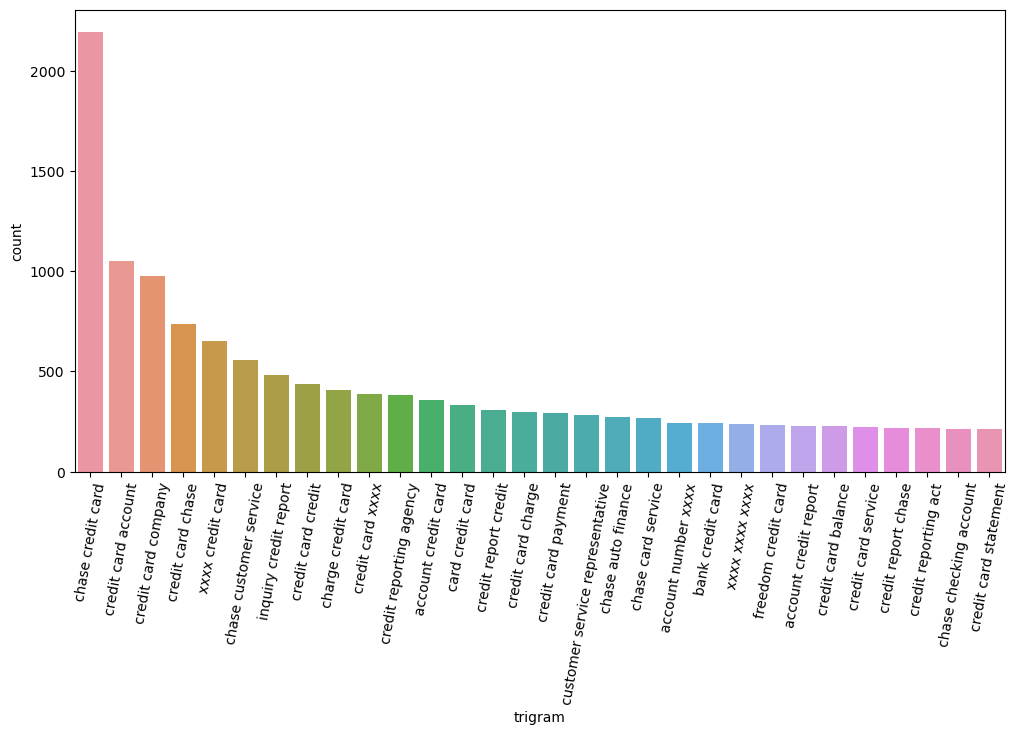

In [31]:
# Plot graph for the top 30 words in the trigram frequency

df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()


#### The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [32]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')


In [33]:
# All masked texts has been removed
df_clean.head()


,complaint_text,lemma,category,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account fund bank account pa...


### 4. Feature Extraction

Convert the raw texts to a matrix of TF-IDF features

- **max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

- **min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [34]:
# Iinitialise the TfidfVectorizer 

tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')


#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0



In [35]:
# Create the Document Term Matrix by transforming the complaints column present in df_clean.

dtm = tfidf.fit_transform(df_clean.Complaint_clean) 


In [ ]:
tfidf.get_feature_names_out()[:10]

In [ ]:
len(tfidf.get_feature_names_out())

### 5. Topic Modelling

#### Topic Modelling using NMF

- #### Non-Negative Matrix Factorization (NMF)

It is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task we are performing the following steps:

 * Find the best number of clusters 
 * Apply the best number to create word clusters
 * Inspect & validate the correction of each cluster wrt the complaints 
 * Correct the labels if needed 
 * Map the clusters to topics/cluster names

In [38]:

from sklearn.decomposition import NMF


#### Manual Topic Modeling


 - You need to do take the trial & error approach to find the best num of topics for your NMF model.

 - The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.



In [39]:
# Load nmf_model with the n_components i.e 5
num_topics =  5 

# Keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_


In [40]:
# nmf_model.fit(dtm)
# len(tfidf.get_feature_names())

In [45]:
# Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]


In [46]:
vocab


array(['aarp', 'abandonment', 'abatement', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [47]:
topics


['account check money bank deposit chase fund day branch transfer number business transaction customer claim',
 'card credit chase balance account score limit year purchase point month application service reason time',
 'payment loan mortgage chase month modification time home pay year rate balance property statement date',
 'report inquiry credit information company reporting debt account file identity remove dispute theft score letter',
 'charge dispute fee chase transaction merchant claim purchase refund fraud service email time contact statement']

In [48]:
len(tfidf.get_feature_names_out())

6484

In [49]:
# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df_clean.Complaint_clean))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()


,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.03,0.00,0.02,0.02,0.01,0
Doc1,0.01,0.02,0.00,0.00,0.01,1
Doc2,0.00,0.03,0.00,0.04,0.00,3
Doc3,0.02,0.03,0.01,0.05,0.01,3
Doc4,0.07,0.00,0.01,0.00,0.00,0


In [50]:
# Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = significant_topic


In [54]:
pd.set_option('display.max_colwidth', 200)
#df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==2].head(10)


In [55]:
df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==4].head(30)


,complaint_text,Complaint_clean,category,Topic
21,on xxxx i made a payment to an online retailer using chase quick pay with xxxx on the chase website i realized that this was a scam website after no confirmation product or response to any inquiri...,payment retailer chase pay website scam website confirmation product response inquiry order contact chase information transaction attempt retailer bank contact chase message way transaction conta...,"Money transfer, virtual currency, or money service+Domestic (US) money transfer",4
30,to whom it may concern chase bank charged wrongly overdraft fees i have alert of low balance or unsuficent fee balance and always deposit immediatly to cover transactions if needed but chase alway...,concern bank overdraft fee alert balance fee balance deposit transaction chase change order charge overdraft fee guideline refund overdrawft bank fault money document chase refund way place,Checking or savings account+Checking account,4
40,xxxx xxxx a sofa love seat table and chairs and was never delivered debit card charged bank says visa denied claim we have no furniture and no money,seat table chair deliver debit card charge bank visa claim furniture money,Checking or savings account+Checking account,4
45,i made a purchase with xxxx xxxx xxxx on in the amount of i was charged twice for this transaction i placed a disputes case with chase bank on when i noticed the charge on my account i called back...,transaction place dispute case chase bank notice charge account credit charge charge post credit debt card use work account activity report fraud account accuse dispute department place dispute c...,Checking or savings account+Checking account,4
48,jp morgan chase bank please answer the following questions on xxxxxxxx xxxxxxxxxxxxxxxx xxxxxxxx xxxxxxxx jpmorgan chase accessed information about me through xxxx xxxx xxxx xxxx \nwhat was the...,answer follow question information reason access information chase checking account number accord check statement chase route number dispute number chase number match response information...,Checking or savings account+Checking account,4
63,i tried to send almost at xxxx and the transaction was cancelled due to having no id i was charged but never received the service i was supposed to receive a refund back to my card but it never ha...,transaction charge receive service refund card happen account m,Checking or savings account+Checking account,4
78,my dispute is for not receiving services listed below one night at the hotel in xxxx for friday transportation to the hotel for friday private city tour of xxxx for friday xxxx xxxx private tour...,dispute service list night city tour tour reason service reason process request request ticket party refund dispute credit card chase visa charge credit card dispute department dispute vendor stat...,Credit card or prepaid card+General-purpose credit card or charge card,4
88,i preordered an item on xxxxxxxx and paid with a chase credit card the merchant xxxx xxxx gave an estimated product shipment date of xxxxxxxx after waiting for this item for a significant amount...,item chase credit card merchant estimate product shipment date item time order item ship merchant state order method payment business day method payment chase credit card close message chase r...,Credit card or prepaid card+General-purpose credit card or charge card,4
101,i purchase is an airline ticket on xxxxxxxx and it was xxxx dollar but the i realize it was the wrong airport so i called right away to cancel the ticket and since it was before hours so i could c...,airline ticket dollar airport call ticket hour post account day money purchase airline ticket money dollar money balance statement balance account show account charge airline ticket refund sta...,Checking or savings account+Checking account,4
129,this complaint is a follow up regarding a complaint xxxx filed on cfpb \n\nthe original complaint was regarding a dispute detailed below \n\nmy laptop was st

In [56]:
# Print the first 10 Complaint for each of the Topics
temp =df_clean[['complaint_text','Complaint_clean','category','Topic']].groupby('Topic').head(10)
temp.sort_values('Topic')


,complaint_text,Complaint_clean,category,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a s...,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Debt collection+Credit card debt,0
69,someone called stating i had felony committed under my social security number and name took xxxx out of my checking account to secure my assets stating from police department,state felony security number check account asset state police department,Checking or savings account+Checking account,0
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was c...,son deposit chase account fund bank account pay money speek son money bank money son call chase time check owner country time date check number claim number chase,Checking or savings account+Checking account,0
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actua...,account debit card branch customer service representative account branch remove fund deposit place employment return bank customer service representative fund post business day branch retrieve fun...,Checking or savings account+Checking account,0
43,chase sent me an email today with the innocuous title important information regarding changes to your chase account they often use similar titles for ads and other communications \n\nin it the...,chase email today title information change chase account title ad communication force bind arbitration contract method information consequence problem chase account opt chase email mail letter inf...,Credit card or prepaid card+General-purpose credit card or charge card,0
42,my card went missing and i didnt realize it until today i checked my email and they said there has been deposits and money taken out again i had in my bank account and its gone,card today check email deposit money bank account,Checking or savings account+Checking account,0
35,i opened the saving account for the bonus i was supposed to received the bonus after consecutive auto transfers from checking to savings i notice on that automatic transfer was cancelled for not e...,bonus auto transfer check saving notice transfer fund check account fund account request team transfer month office fail concern case,Checking or savings account+Savings account,0
24,mishandling of this account by chase auto and xxxx,mishandle account chase auto,Vehicle loan or lease+Loan,0
92,in several transactions on my chase checking account was fraudulent so i filed a report with chase instead of helping me chase closed all my accounts and refused to have a banking relationship wit...,transaction chase account file report chase account banking relationship chase money month balance file complaint month chase debt idea chase balance transaction chase,Debt collection+I do not know,0
27,i opened an account with chase bank on xxxx and used a code for xxxx bonus i called to follow up on xxxxxxxx about the terms and was told everything was on the account and once i made xxxx direct ...,account follow term account deposit bonus pay day deposit account coupon code day bonus,Checking or savings account+Checking account,0


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [57]:
# Create the dictionary of Topic names and Topics
topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)


In [58]:
df_clean.head()


,complaint_text,lemma,category,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a s...,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt c...,Debt collection+Credit card debt,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Bank Account services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the a...,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording a...,Credit card or prepaid card+General-purpose credit card or charge card,card agent upgrade anniversary date change agent information order account anniversary date agent,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of ...,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports+Other personal consumer report",chase card report application submit identity consent service extend credit verify identity applicant,Theft/Dispute Reporting
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than ...,try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immediately contact xxxx refer chase bank immediately contact chase bank get...,"Credit reporting, credit repair services, or other personal consumer reports+Credit reporting",book ticket come offer ticket reward card information minute notify screen decision chase bank notification screen representative speak application state information credit offer account statement...,Theft/Dispute Reporting
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was c...,grand son check deposit chase account fund clear chase bank close account pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell verif...,Checking or savings account+Checking account,son deposit chase account fund bank account pay money speek son money bank money son call chase time check owner country time date check number claim number chase,Bank Account services


#### **Lets check if there is any class imbalance**

<Axes: xlabel='Topic', ylabel='count'>

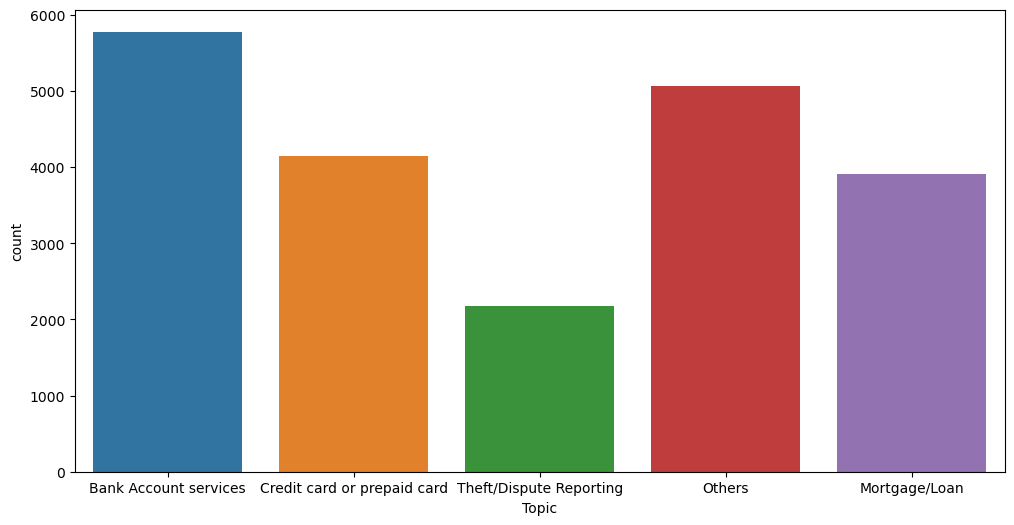

In [59]:
# Plot graph to check class imbalance
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=df_clean)


### 6. Model building using supervised learning

#### Model training and evaluation

Supervised model to predict any new complaints to the relevant Topics.

- Build the model to create the topics for each complaints. In the below section we will use them to classify any new complaints.

- Since we will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

#### **Preprocessing for model**

In [60]:
# Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

training_data = df_clean[['complaint_text','Topic']]


In [61]:
training_data.head()


,complaint_text,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a s...,Bank Account services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the a...,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of ...,Theft/Dispute Reporting
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than ...,Theft/Dispute Reporting
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was c...,Bank Account services


#### Reverse topic names mapping for supervised learning

In [62]:
# Reverse topic names mapping for supervised learning

reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
# Replace Topics with Topic Names
training_data['Topic'] = training_data['Topic'].map(reverse_topic_mapping)
training_data.head()


,complaint_text,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a s...,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the a...,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of ...,3
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than ...,3
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was c...,0


In [63]:
training_data[['complaint_text','Topic']][training_data.Topic==2].head(30)


,complaint_text,Topic
20,during the summer months i experience a decline income due to my employment therefore i request a one month payment extension with my auto loan company chase for the past almost fours years my req...,2
57,i have been trying to do a loan modification with chase and all they do is give me the runaround im mo behind they dont let me make payments i have aens all doc in but always asking more,2
58,i made a purchase of on xxxxxxxx i made payments of on xxxxxxxx and on xxxxxxxx the minimum payment was the closing date was xxxxxxxx please see attached statement that statement xxxxxxxx show...,2
73,i have wired through one of chase branches in xxxx xxxx the exact reinstatement amount of to jpmorgan chase bank in order to removewithdraw their wrongful foreclosure proceedings on my residential...,2
81,i bought a new xxxx xxxx on xxxxxxxx from xxxx xxxx xxxx in xxxx \ni paid the loan in xxxxxxxxbut chase financial never release the title \ni contacted chase several time with no resolution each t...,2
82,i recently called to ask chase bank why they reported to the credit bureau that i was days late on a payment that was already paid off when i called i got this info they showed that on the xxxx o...,2
86,a student loan with chase bank they sold there accounts to xxxx which now holds my account this happened back in though i have made numerous attempts to contact them they do not respond and they ...,2
99,my name is xxxx xxxx i have missed a payment in and was days past due but now current i applied numerous times for a loan modification to get loss mitigation assistance but did not get any help ch...,2
127,i am xxxx military member xxxx with the xxxx chase auto finance is refusing to pay on the gap insurancewaiver coverage that i purchased at the time i signed the financing agreement while station...,2
141,action taken by the company between the dates of xxxxxxxx xxxxxxxx an individual or group of individuals contacted chase claims and opened multiple claims that reversed payments to creditors au...,2




#### Apply the supervised models on the training data created. In this process, we have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


#### **X - Y split**

In [64]:
# x - y  split
X = training_data.complaint_text
y = training_data.Topic


In [65]:
# Write your code to get the Vector count 

# Fit transform the X
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)


In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code here to transform the word vector to tf-idf
#Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)


#### **Train Test Split**

In [67]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)




We have to try atleast 3 models on the train & test data.

#### **We are trying the following models:**
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Compare the evaluation metrics of all models and select one model that is performing the best.**

#### **Logistic regression, Decision Tree & Random Forest**

In [68]:
# Build 3 models and evaluate them using the required metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#### **Custom Classification Report**

In [69]:
# Utlity function to display the model report

def display_classification_report(model,metric):
    
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')
    
    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)
    
    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))
    
    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)
        
    model_report_train = classification_report(y_train,y_train_pred)
    model_report_test = classification_report(y_test,y_test_pred)
    
    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)


    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)

    plt.show();
    

#### Stratified KFold Cross Validation

In [70]:
# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)


#### **Custom GridSearchCV**

In [71]:
# Utility method to get the GridSearchCV object
def grid_search(model,folds,params,scoring):
    
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search
    

In [72]:
# Utility function to display the best score and parameters of the GridSearchCV model
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)
    

#### **Multinomial Naive Bayes Classification**



ROC AUC Score Train: 0.95
ROC AUC Score Test: 0.93
Train Accuracy : 0.68
Test Accuracy : 0.64
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.56      0.96      0.71      4332
           1       0.81      0.50      0.62      3110
           2       0.74      0.89      0.81      3802
           3       0.97      0.20      0.34      1632
           4       0.88      0.47      0.62      2928

    accuracy                           0.68     15804
   macro avg       0.79      0.60      0.62     15804
weighted avg       0.76      0.68      0.66     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.52      0.95      0.67      1444
           1       0.77      0.41      0.54      1037
           2       0.71      0.85      0.78      1267
           3       0.96      0.17      0.29       544
           4       0.86      0.40      0.55       976

    accuracy            

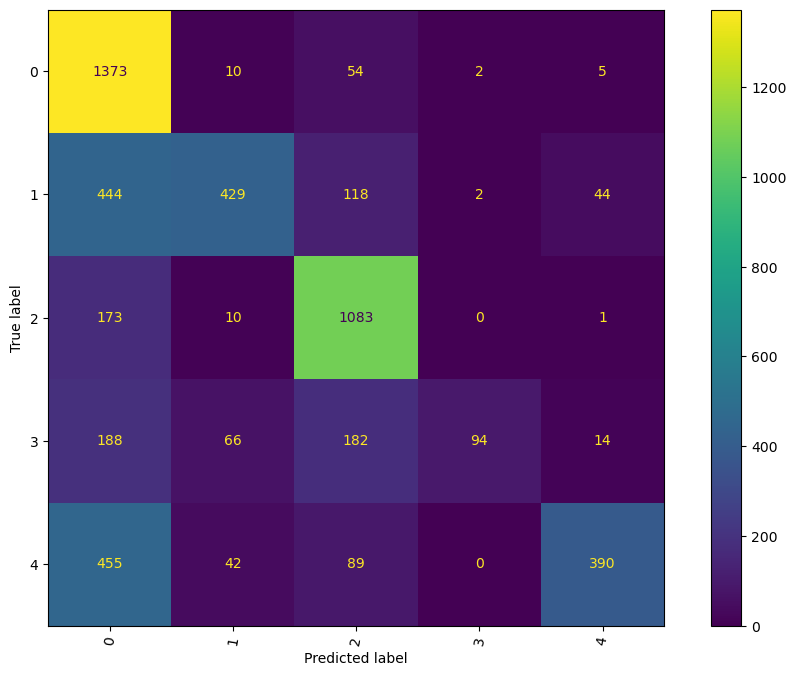

In [75]:
# Multinomial Naive Bayes Classification

# Create MNB model object
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Multinomial Naive Bayes classification report
metric1=[]
display_classification_report(mnb,metric1)


#### **Logistic Regression Classification**

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.95
Test Accuracy : 0.9
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4332
           1       0.95      0.94      0.95      3110
           2       0.95      0.98      0.96      3802
           3       0.95      0.88      0.92      1632
           4       0.95      0.91      0.93      2928

    accuracy                           0.95     15804
   macro avg       0.95      0.94      0.94     15804
weighted avg       0.95      0.95      0.95     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1444
           1       0.91      0.89      0.90      1037
           2       0.92      0.96      0.94      1267
           3       0.93      0.81      0.87       544
           4       0.89      0.85      0.87       976

    accuracy              

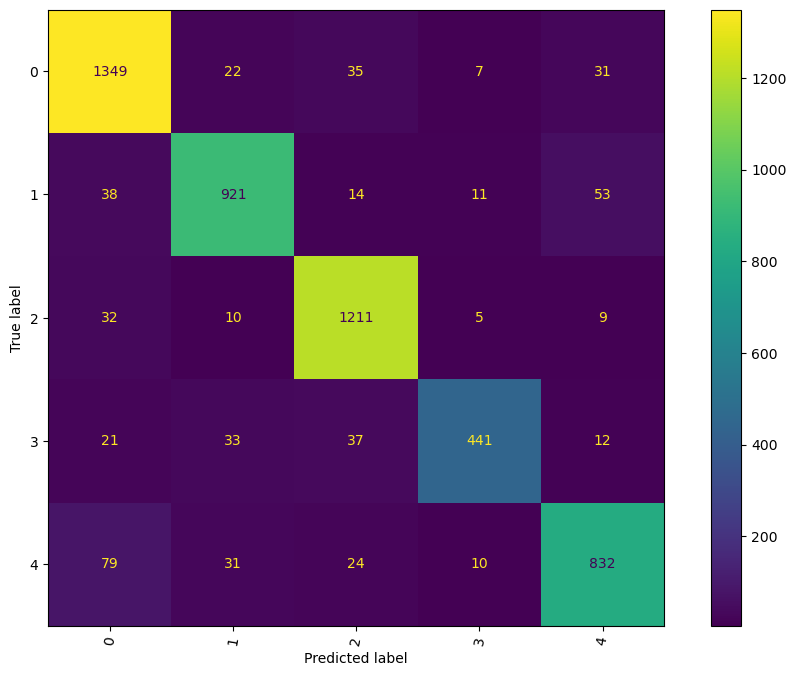

In [76]:
# Logistic Regression Classification
log_reg = LogisticRegression(random_state=40,solver='liblinear')

# Fit model
log_reg.fit(X_train,y_train)

# Logistic Regression classification report
metric2=[]
display_classification_report(log_reg,metric2)


#### **Decision Tree Classification**

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.85
Train Accuracy : 1.0
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4332
           1       1.00      1.00      1.00      3110
           2       1.00      1.00      1.00      3802
           3       1.00      1.00      1.00      1632
           4       1.00      1.00      1.00      2928

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1444
           1       0.75      0.76      0.76      1037
           2       0.83      0.83      0.83      1267
           3       0.74      0.75      0.74       544
           4       0.67      0.67      0.67       976

    accuracy              

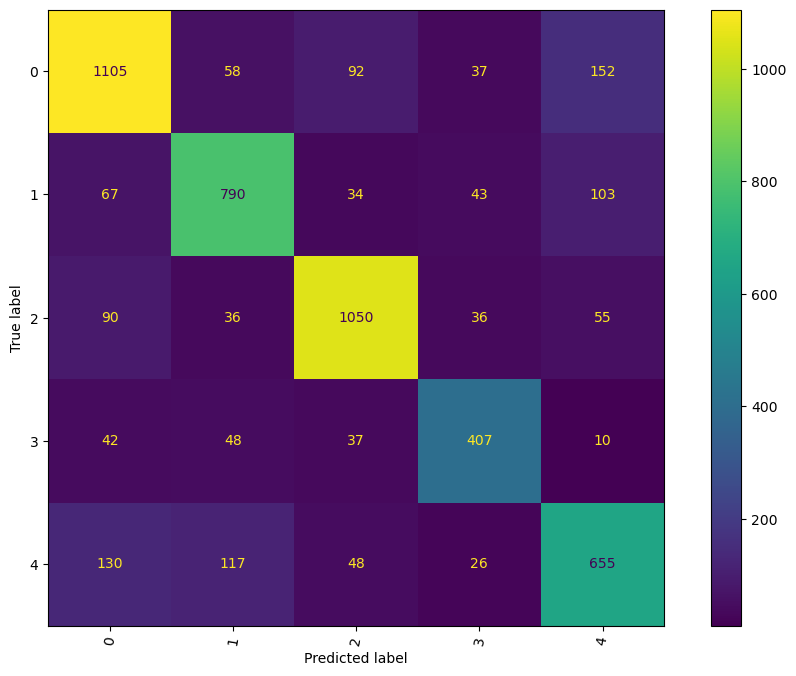

In [77]:
# Decision Tree Classification
dtc = DecisionTreeClassifier(random_state=40)

# Fit model
dtc.fit(X_train,y_train)

# Decision Tree Classification Report
metric3=[]
display_classification_report(dtc,metric3)


#### **Random Forest Classification**

OOB SCORE : 0.8251075677043787
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.98
Train Accuracy : 1.0
Test Accuracy : 0.83
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4332
           1       1.00      1.00      1.00      3110
           2       1.00      1.00      1.00      3802
           3       1.00      1.00      1.00      1632
           4       1.00      1.00      1.00      2928

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1444
           1       0.84      0.78      0.81      1037
           2       0.85      0.91      0.88      1267
           3       0.92      0.69      0.79       544
           4       0.86      0.72      0.78       

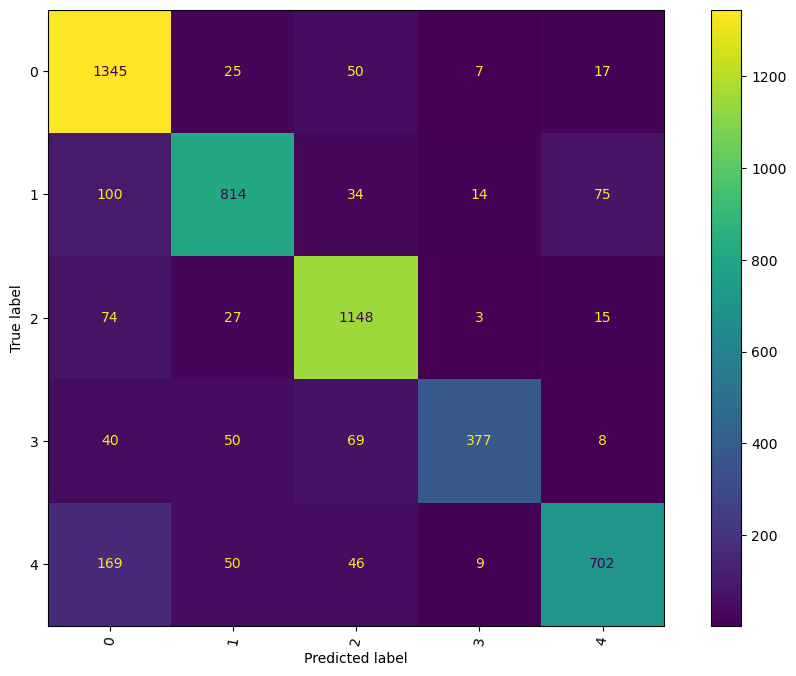

In [78]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 500,random_state=40, n_jobs = -1,oob_score=True)

# Fit model
rf.fit(X_train,y_train)

# oob score
print('OOB SCORE :',rf.oob_score_)

# Random Forest Classification Report
metric4=[]
display_classification_report(rf,metric4)


### Hyper parameter tuning with GridSearchCV

#### **Multinomial Naive Bayes with GridSearchCV**

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score:  0.7549978976369439
Best Hyperparameters:  {'alpha': 0.1}
ROC AUC Score Train: 0.98
ROC AUC Score Test: 0.95
Train Accuracy : 0.85
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      4332
           1       0.85      0.79      0.82      3110
           2       0.86      0.91      0.88      3802
           3       0.89      0.70      0.78      1632
           4       0.89      0.80      0.84      2928

    accuracy                           0.85     15804
   macro avg       0.86      0.83      0.84     15804
weighted avg       0.85      0.85      0.85     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      1444
           1       0.73      0.61      0.66      1037
           2       0.78      0.87      0.82      1267
   

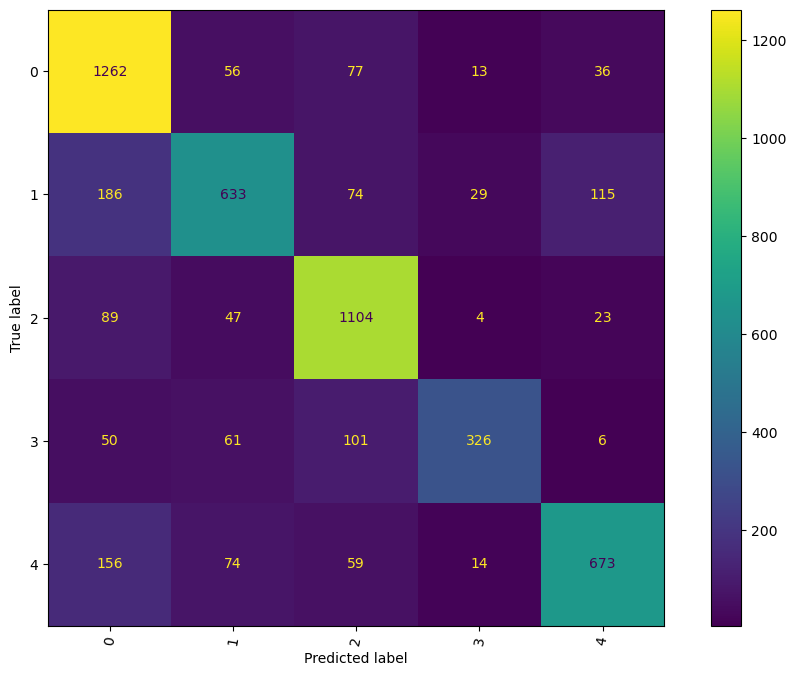

In [79]:
# Multinomial Naive Bayes with GridSearchCV

mnb = MultinomialNB()

mnb_params = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001)  
}

# Create gridsearch object
grid_search_mnb = grid_search(mnb, folds, mnb_params, scoring=None)

# Fit model
grid_search_mnb.fit(X_train, y_train)

# Print best hyperparameters
print_best_score_params(grid_search_mnb)

# Multinomial Naive Bayes with GridSearchCV Classification Report
metric5=[]
display_classification_report(grid_search_mnb,metric5)


#### **Logistic Regression with GridSearchCV**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score:  0.9211587424264873
Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.94
Test Accuracy : 0.93
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4332
           1       0.93      0.94      0.93      3110
           2       0.95      0.96      0.96      3802
           3       0.93      0.90      0.91      1632
           4       0.93      0.91      0.92      2928

    accuracy                           0.94     15804
   macro avg       0.94      0.93      0.93     15804
weighted avg       0.94      0.94      0.94     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1444
           1       0.92      0.92      0.92      1037
           2       0.95     

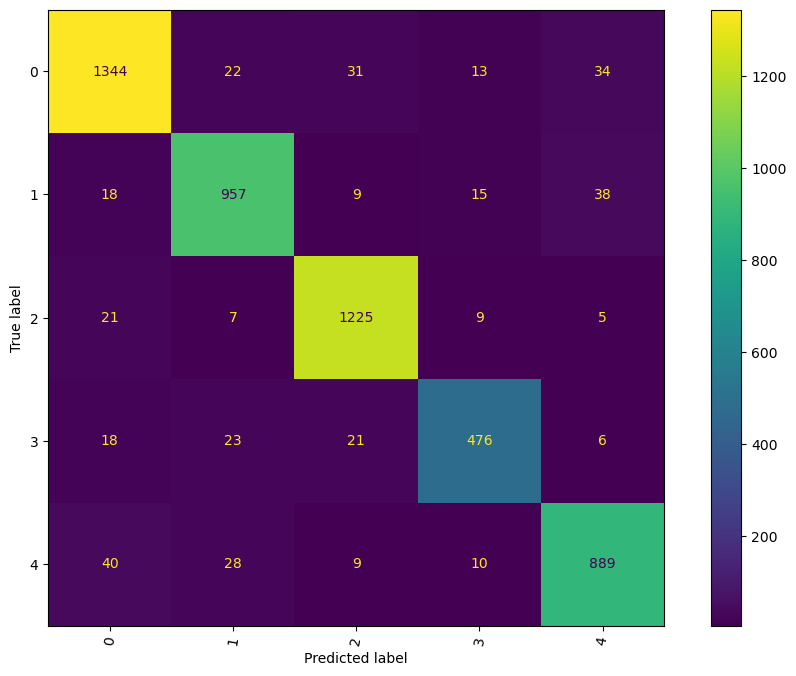

In [80]:
# Logistic Regression with GridSearchCV

# logistic regression
log_reg = LogisticRegression()

# Hyperparameter for Logistic Regression
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }

# Create gridsearch object
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

# Fit model
grid_search_log.fit(X_train, y_train)

# Print best hyperparameters
print_best_score_params(grid_search_log)

# Logistic Regression with GridSearchCV Classification Report
metric6=[]
display_classification_report(grid_search_log,metric6)




#### **Decision Tree Classification with GridSearchCV**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  0.9320923433765378
Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 30}
ROC AUC Score Train: 0.97
ROC AUC Score Test: 0.94
Train Accuracy : 0.81
Test Accuracy : 0.77
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      4332
           1       0.80      0.84      0.82      3110
           2       0.85      0.86      0.86      3802
           3       0.74      0.74      0.74      1632
           4       0.78      0.73      0.76      2928

    accuracy                           0.81     15804
   macro avg       0.80      0.80      0.80     15804
weighted avg       0.81      0.81      0.81     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1444
           1       0.75      0.82      0.78      1037
           2       0.83      

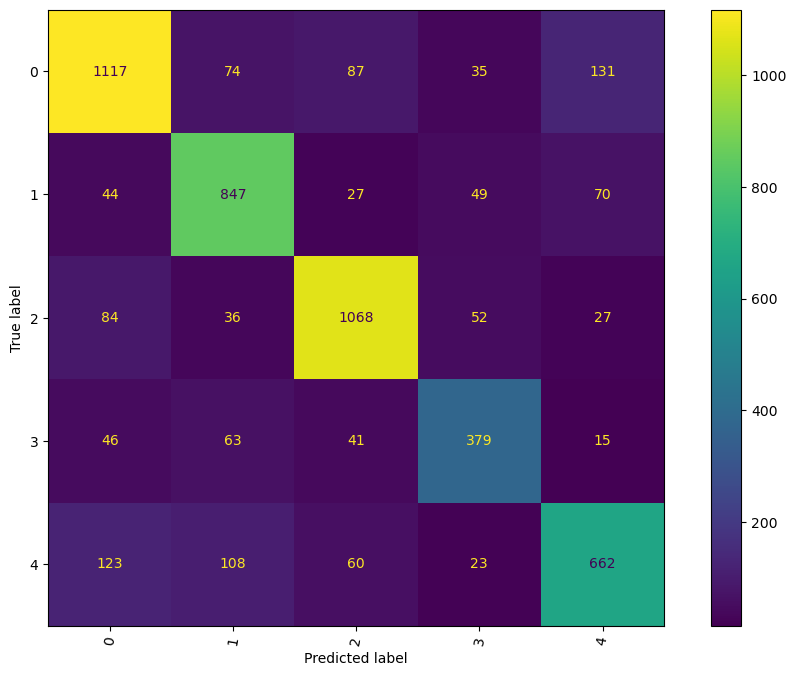

In [81]:
# Decision Tree Classification wuth GridSearchCV

dtc = DecisionTreeClassifier(random_state=40)

dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}

# Create gridsearch object
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

# Fit model
grid_search_dtc.fit(X_train, y_train)

# Print best hyperparameters
print_best_score_params(grid_search_dtc)

# Decision Tree with GridSearchCV Classification Report
metric7=[]
display_classification_report(grid_search_dtc,metric7)


#### **Random Forest Classifier with GridSearchCV**

In [ ]:
# Random Forest Classifier with GridSearchCV

rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)

# hyperparameters for Random Forest
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }

# create gridsearch object
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')

# fit model
grid_search_rfc.fit(X_train, y_train)

# oob score
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

# print best hyperparameters
print_best_score_params(grid_search_rfc)

# Random Forest with GridSearchCV Classification Report
metric8=[]
display_classification_report(grid_search_rfc,metric8)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


### 7. Model inference

#### Consolidated view of all the models and their metrics

In [75]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ], 
        'Multinomial Naive Bayes': metric1
        }

mnb_metric = pd.DataFrame(table ,columns = ['Metric', 'Multinomial Naive Bayes'] )
log_metric = pd.Series(metric2, name = 'Logistic Regression')
dtc_metric = pd.Series(metric3, name = 'Decision Tree Classifier')
rfc_metric = pd.Series(metric4, name = 'Random Forest Classifier')
grid_mnb_metric = pd.Series(metric5, name = 'Multinomial Naive Bayes with GridSearchCV')
grid_log_metric = pd.Series(metric6, name = 'Logistic Regression with GridSearchCV')
grid_dtc_metric = pd.Series(metric7, name = 'Decision Tree Classifier with GridSearchCV')
grid_rfc_metric = pd.Series(metric8, name = 'Random Forest Classifier with GridSearchCV')

final_metric = pd.concat([mnb_metric,log_metric,dtc_metric,rfc_metric,
                         grid_mnb_metric,grid_log_metric,grid_dtc_metric,grid_rfc_metric], axis = 1)

final_metric


,Metric,Multinomial Naive Bayes,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,Multinomial Naive Bayes with GridSearchCV,Logistic Regression with GridSearchCV,Decision Tree Classifier with GridSearchCV,Random Forest Classifier with GridSearchCV
0,ROC_AUC Score(Train),0.95,1.00,1.00,1.00,0.99,0.99,0.97,0.99
1,ROC_AUC Score(Test),0.93,0.99,0.85,0.97,0.94,0.99,0.94,0.97
2,Accuracy(Train),0.68,0.94,1.00,1.00,0.89,0.93,0.82,0.88
3,Accuracy(Test),0.65,0.90,0.77,0.82,0.76,0.92,0.78,0.78
4,Precision(Train),0.76,0.94,1.00,1.00,0.89,0.93,0.82,0.89
5,Precision(Test),0.74,0.90,0.77,0.83,0.76,0.92,0.78,0.80
6,Recall(Train),0.68,0.94,1.00,1.00,0.89,0.93,0.82,0.88
7,Recall(Test),0.65,0.90,0.77,0.82,0.76,0.92,0.78,0.78
8,F1-Score(Train),0.64,0.94,1.00,1.00,0.89,0.93,0.82,0.88
9,F1-Score(Test),0.60,0.90,0.77,0.81,0.75,0.92,0.78,0.76


#### **Complaint Prediction using the best model**

**The best model looks to be Logistic Regression with GridSearchCV**

In [76]:
# Test complaint text
test_complaint= 'I tried to make a transaction at a supermarket retail store, using my chase \
debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.'


In [78]:
# Vectorize and tf-idf tranform
test = count_vect.transform([test_complaint])
test_tfidf = tfidf_transformer.transform(test)


In [79]:
# Predict
prediction=grid_search_log.predict(test_tfidf)
prediction


array([3])

In [80]:
topic_mapping[prediction[0]]


'Theft/Dispute Reporting'